In [49]:
import pandas as pd

In [50]:
import math

In [51]:
import matplotlib.pyplot as plt

In [52]:
data = pd.read_excel('Dataset.xlsx')

In [53]:
mean= data['Penjualan B (pcs)'].mean()
median =  data['Penjualan B (pcs)'].median()
modus =  data['Penjualan B (pcs)'].mode()

In [54]:
print("mean:", mean)
print("median: ", median)
print("modus: ", modus)

mean: 205.54545454545453
median:  157.0
modus:  0    0
Name: Penjualan B (pcs), dtype: int64


In [89]:
data_terkecil = data['Penjualan B (pcs)'].min()
data_terbesar = data['Penjualan B (pcs)'].max()
print("", data_terkecil, data_terbesar)

 0 545


In [56]:
print(data_terkecil)

0


In [57]:
jangkauan = data['Penjualan B (pcs)'].max() - data['Penjualan B (pcs)'].min()

In [58]:
print(jangkauan)

545


In [59]:
Q1 = data['Penjualan B (pcs)'].quantile(0.25)

In [60]:
Q3 = data['Penjualan B (pcs)'].quantile(0.75)

In [61]:
IQR = Q3 - Q1

In [62]:
print(IQR)

244.0


In [63]:
variance = data['Penjualan B (pcs)'].var()

In [90]:
standar_deviasi = data['Penjualan B (pcs)'].std()
print("", standar_deviasi)

 160.0851336008438


In [65]:
skewness = data['Penjualan B (pcs)'].skew()

In [66]:
kurtosis = data['Penjualan B (pcs)'].kurt()

In [67]:
#data visualization (tbf)

In [68]:
length = len(data['Penjualan B (pcs)'])

In [69]:
print(length)

121


In [70]:
kdata = math.ceil(1 + 3.3 * math.log(length, 10))

In [71]:
k_b = kdata

In [72]:
print(k_b)

8


In [73]:
interval = math.ceil(jangkauan / k_b)

In [74]:
print(interval)

69


In [75]:
kelas = []

In [76]:
tepi_kelas = []

In [77]:
interval_kelas = []

In [78]:
for i in range(k_b):
    BAK = data_terkecil + i * interval
    BBK = BAK + interval
    tepi = BAK - 0.5
    kelas.append(i + 1)
    interval_kelas.append(str(BAK) + "-" + str(BBK))
    tepi_kelas.append(tepi)
tepi_kelas.append(BBK + 0.5)
print("6. Kelas =", kelas)
print("6. Interval kelas =", interval_kelas)
print("6. Tepi kelas =", tepi_kelas)

6. Kelas = [1, 2, 3, 4, 5, 6, 7, 8]
6. Interval kelas = ['0-69', '69-138', '138-207', '207-276', '276-345', '345-414', '414-483', '483-552']
6. Tepi kelas = [-0.5, 68.5, 137.5, 206.5, 275.5, 344.5, 413.5, 482.5, 552.5]


In [79]:
# Convert data into a pandas DataFrame
df = pd.DataFrame(data, columns=["Penjualan B (pcs)"])

# Create frequency distribution using pd.cut and value_counts
df["Range"] = pd.cut(df["Penjualan B (pcs)"], bins=tepi_kelas, labels=interval_kelas, include_lowest=True)
frequency_table = df["Range"].value_counts().sort_index()
relative_frequency = frequency_table / frequency_table.sum() * 100

# Convert to DataFrame for a cleaner look
frequency_distribution = pd.DataFrame(
    {
        "Kelas": kelas,
        "Range": frequency_table.index,
        "Frequency": frequency_table.values,
        "Relative Frequency (%)": relative_frequency,
    }
)
frequency_distribution.reset_index(drop=True, inplace=True)


In [80]:
print("\nTable of Frequency Distribution")
print(frequency_distribution)


Table of Frequency Distribution
   Kelas    Range  Frequency  Relative Frequency (%)
0      1     0-69         28               23.140496
1      2   69-138         25               20.661157
2      3  138-207         18               14.876033
3      4  207-276         14               11.570248
4      5  276-345          7                5.785124
5      6  345-414          8                6.611570
6      7  414-483         10                8.264463
7      8  483-552         11                9.090909


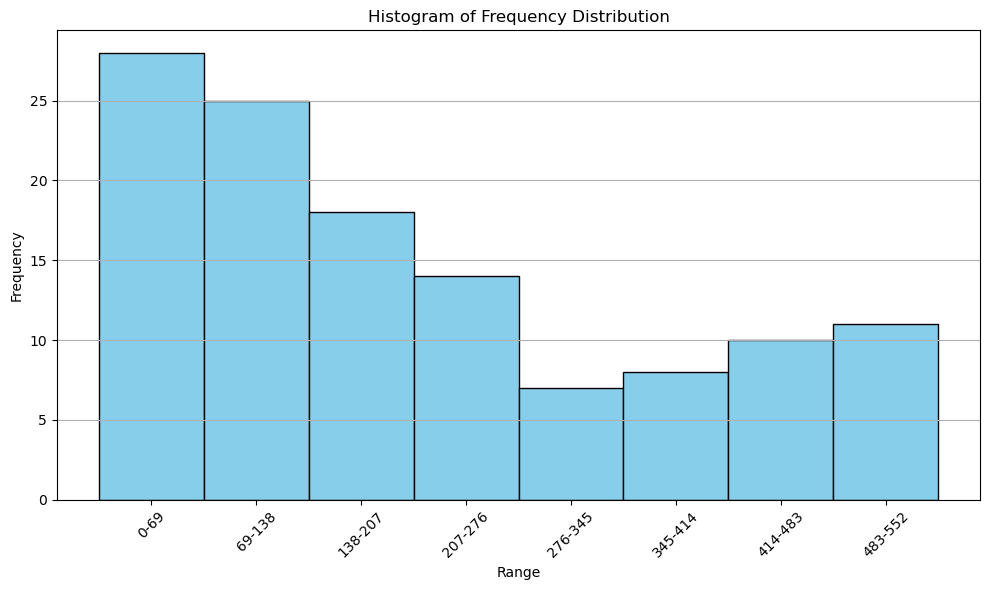

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(
    frequency_distribution["Range"],
    frequency_distribution["Frequency"],
    width=1,
    edgecolor="black",
    color="skyblue",
)
plt.title("Histogram of Frequency Distribution")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis="y")

# Show the plot
plt.tight_layout()
plt.show()

In [82]:
batas_bawah = Q1 - 1.5*IQR

In [83]:
batas_atas = Q3 + 1.5*IQR

In [84]:
print(batas_bawah)

-286.0


In [85]:
print(batas_atas)

690.0


In [86]:
#Dengan menggunakan metode IQR, dapat kita temukan outliernya. Diketahui IQR dari data penjualan B adalah 244
#Dengan menggunakan IQR ditemukan batas bawah -286 dan batas atas 690, kita dapat menemukan outlier
#Apabila ada suatu nilai di atas batas atas dan di bawah batas bawah, berarti nilai tersebut adalah outlier
#Dari histogram di atas tidak ada data yang melebihi batas atas maupun batas bawah 
#yang mana berarti tidak ada outlier dalam data penjualan B

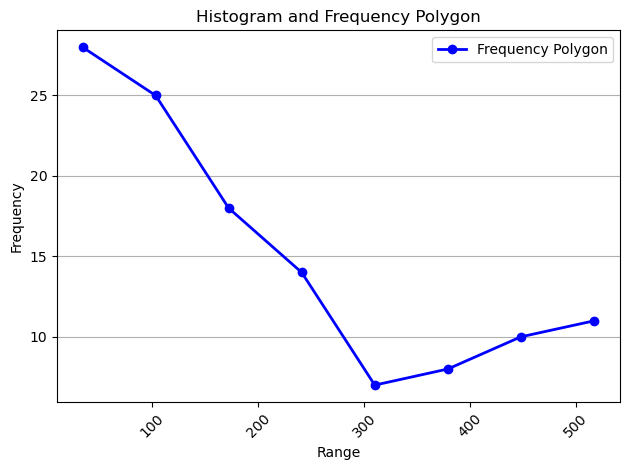

In [87]:
midpoints = [
    (tepi_kelas[i] + tepi_kelas[i + 1]) / 2 for i in range(len(tepi_kelas) - 1)
]
plt.plot(
    midpoints,
    frequency_table.values,
    marker="o",
    color="blue",
    linestyle="-",
    linewidth=2,
    label="Frequency Polygon",
)

# Penambahan label dan grid
plt.title("Histogram and Frequency Polygon")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()



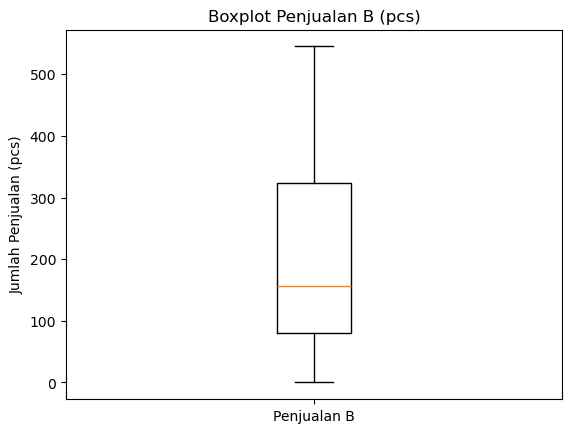

In [88]:
plt.boxplot(data['Penjualan B (pcs)'])
plt.title('Boxplot Penjualan B (pcs)')  
plt.ylabel('Jumlah Penjualan (pcs)')    
plt.xticks([1], ['Penjualan B'])
plt.show()                             